# Data Visualization

En nuestras actividades del día a día como científicos de datos, regularmente utilizaremos las siguientes 7 gráficas:

1. Gráfica de dispersión (scatter plot)
2. Gráfica de lineas
3. Histograma (histogram)
4. Gráfica de barras y gráfica de barras apiladas (bar & stack bar chart)
5. Gráfica de caja o bigotes (Box plot)
6. Mapa de calor (Heatmap)
7. Mapa de correlación (Correlogram)


## Paquetes a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Se utilizar para mostrar la gráfica inmediatamente después del código 
%matplotlib inline 
import seaborn as sns

In [2]:
from bubbly.bubbly import bubbleplot 
from plotly.offline import init_notebook_mode, iplot

In [3]:
#Seaborn es más que una mera librería de visualización, es una librería para representación estadística, 
#ya que muestra fácilmente la relación que guardan los datos para detectar tendencias y patrones.
#https://medium.com/ironhack/data-visualization-con-pandas-y-seaborn-1044906af34f

In [4]:
#matplotlib.pyplot Es una interfaz basada en estados para matplotlib. 
#Proporciona una forma de graficar similar a MATLAB

### Importamos nuestros datos

El dataset iris es uno de los más utilizados en ejercicios básicos de aprendizaje automático. Es breve, limpio y sus datos están muy bien distribuidos.

In [5]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


El dataset gapminder proviene directamente de los datos del baco mundial y es muy probable que lo encuentres en estudios de desigualdad y derechos humanos

In [6]:
!git clone 'https://github.com/psterk1/data_analytics/'

gdp = pd.read_csv("gapminder.csv")
gdp

Cloning into '''...
fatal: protocol ''https' is not supported


,Unnamed: 0,country,year,population,cont,life_exp,gdp_cap
0,11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
1,23,Albania,2007,3600523.0,Europe,76.423,5937.029526
2,35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
3,47,Angola,2007,12420476.0,Africa,42.731,4797.231267
4,59,Argentina,2007,40301927.0,Americas,75.320,12779.379640
...,...,...,...,...,...,...,...
137,1655,Vietnam,2007,85262356.0,Asia,74.249,2441.576404
138,1667,West Bank and Gaza,2007,4018332.0,Asia,73.422,3025.349798
139,1679,"Yemen, Rep.",2007,22211743.0,Asia,62.698,2280.769906
140,1691,Zambia,2007,11746035.0,Africa,42.384,1271.211593


El siguiente dataset es uno de los que se encuentran precargados con el paquete seaborn. El dataset simula ser una base de datos que contiene información de fechas de vuelos y totales de pasajeros.

In [7]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


## 1. Gráfica de dispersión (scatter plot)

Los gráficos de dispersión y de líneas pueden analizar la relación entre diferentes características numéricas. Entre ellos, los diagramas de dispersión se utilizan principalmente para analizar la correlación entre las características.

Una dispersión puede proporcionar dos tipos de información clave:

Si existe una tendencia de correlación numérica o cuantitativa entre las características y si la tendencia es lineal o no lineal;

Observe si hay ruido en los datos y juzgue intuitivamente si el ruido tendrá un gran impacto en el modelo.

In [8]:
#grafica de los datos (aqui mas info: https://seaborn.pydata.org/generated/seaborn.regplot.html)
#Regresion: modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente

## Personalización de la gráfica

#### Mapear un color por cada grupo

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

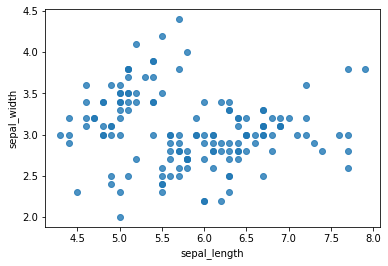

In [9]:
sns.regplot(x=iris['sepal_length'],y=iris['sepal_width'],fit_reg=False)

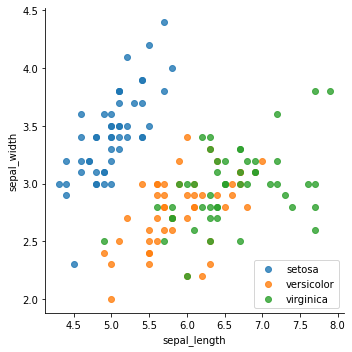

In [10]:
#ahora usando el lmplot para mostrar subconjuntos dentro de nuestros datos con una paleta de colores predefinida.   (https://seaborn.pydata.org/generated/seaborn.lmplot.html)
sns.lmplot(x = "sepal_length", y = "sepal_width", data = iris, hue = "species", fit_reg = False, legend=False)
# Acomodamos las leyendas/codigo de colores  (mas info aqui: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html)
plt.legend(loc = "lower right")

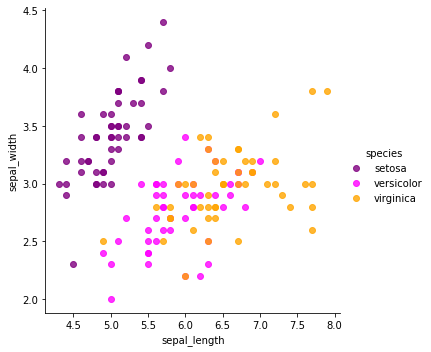

In [11]:
sns.lmplot(x = "sepal_length", y = "sepal_width", data = iris, hue = "species", fit_reg = False,
           palette=dict(setosa="purple", versicolor="magenta", virginica="orange"))

#### Utilizando escalas para mejorar la visualización

Ahora veamos un caso particular. Vamos a hacer uso de los datos de Gapminder, estos contienen información sobre el nivel de ingreso per cápita por país, así como una columna de la esperanza de vida de cada uno de ellos. Todo esto bajo una línea de tiempo en años.

El objetivo es visualizar si existe una correlación entre el nivel de ingresos y la esperanza de vida.

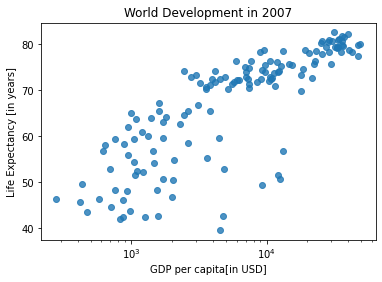

In [12]:
# Scatter plot básico. 

sns.regplot(x="gdp_cap", y="life_exp",data=gdp,fit_reg=False) 
plt.xscale("log")                                                                                         #(mas info aqui https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xscale.html) ej "linear", "log", "symlog", "logit"
                                                                                            #Una escala logarítmica muestra el valor base de 10 elevado a la potencia de un valor. 10 a la 1, 10 a la 2, 10 a la 3
# Definimos en variable los nombres de los ejes y título
xlabel="GDP per capita[in USD]"
ylabel="Life Expectancy [in years]"
title="World Development in 2007"
# Agregamos las etiquetas a los ejes
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()                                                                                                                     #en los notebook se hace el llamado por default/ podriamos no incluirla

Como te habrás dado cuenta, añadimos título y nombres a los ejes. Estos métodos funcionan con todas las gráficas de pyplot y seaborn

## 1.1 Gráfica de burbuja

Es como la gráfica de dispersión pero con una dimensión extra: cada punto en la gráfica puede tener un valor que afecta el tamaño del punto, haciendo que el conjunto de, ahora círculos de distinto tamaño, parezca un conjunto de burbujas.

In [16]:
figure = bubbleplot(dataset=gdp, x_column='gdp_cap', y_column='life_exp', 
    bubble_column='country', time_column='year', size_column='population', color_column='cont', 
    x_title="GDP per Capita", y_title="Life Expectancy", title='Gapminder Global Indicators',
    x_logscale=True, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

c:\Users\sabri\AppData\Local\Programs\Python\Python310\lib\site-packages\bubbly\bubbly.py:213: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\sabri\AppData\Local\Programs\Python\Python310\lib\site-packages\bubbly\bubbly.py:213: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\sabri\AppData\Local\Programs\Python\Python310\lib\site-packages\bubbly\bubbly.py:213: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\sabri\AppData\Local\Programs\Python\Python310\lib\site-packages\bubbly\bubbly.py:213: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\sabri\AppData\Local\Programs\Python\Python310\lib\site-packages\bubbly\

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## 2. Gráfica de línea (lineplot)

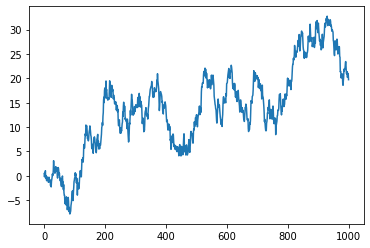

In [ ]:
# Definimos los valores a graficar como la suma acumulada de numeros aleatorios entre el 1 y el 1000                                           (https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)
values=np.cumsum(np.random.randn(1000,1))
# Usando la funcion de plot
plt.plot(values)                                                                                                                    #(https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)


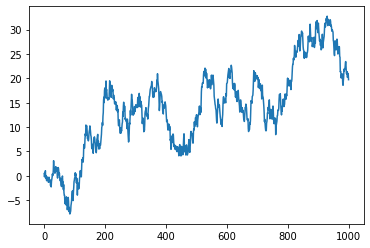

In [ ]:
plt.plot(values,"-")            

## 3. Histograma (histogram)

#### Con Matplotlib

In [ ]:
gdp["life_exp"]

0      43.828
1      76.423
2      72.301
3      42.731
4      75.320
        ...  
137    74.249
138    73.422
139    62.698
140    42.384
141    43.487
Name: life_exp, Length: 142, dtype: float64

Text(0, 0.5, 'Count')

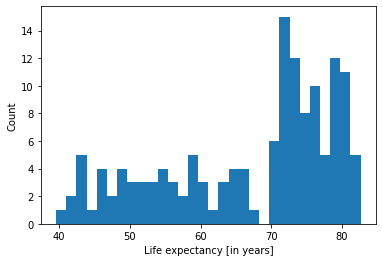

In [ ]:
plt.hist(gdp["life_exp"],bins=30,orientation="vertical")
plt.xlabel("Life expectancy [in years]")
plt.ylabel("Count")


#### Con Seaborn

Text(0.5, 0, 'Length')

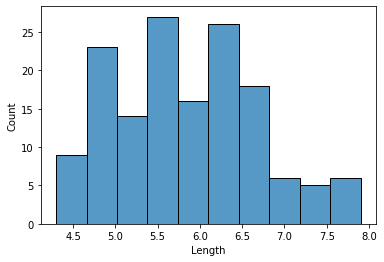

In [ ]:
sns.histplot(iris["sepal_length"],bins=10)
plt.xlabel("Length")

#### Generar un histograma por cada categoría (faceting)

Caso 1:
- Tenemos datos distribuidos en distintas categorías
- Los valores que se relacionan con las categorías se encuentran en la misma escala y en un rango determinado

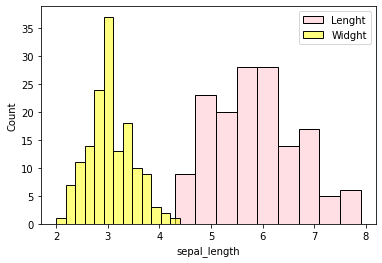

In [ ]:
sns.histplot(iris["sepal_length"],color="pink", label="Lenght",alpha=0.5)
sns.histplot(iris["sepal_width"],color="yellow", label="Widght",alpha=0.5)
plt.legend(loc="upper right")

Caso 2:
- Tenemos datos distribuidos en distintas categorías
- Los valores que se relacionan con las categorías se encuentran en la misma escala y en un rango determinado

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

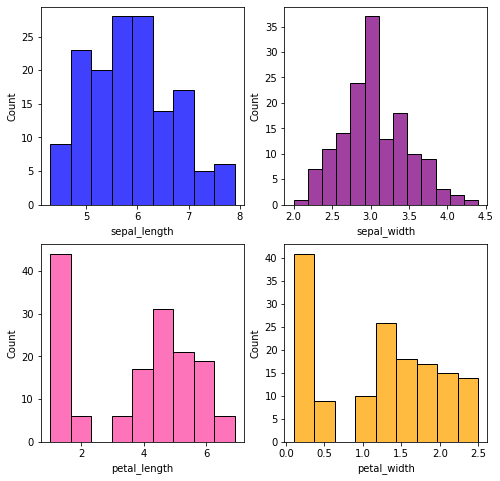

In [ ]:
f,axes=plt.subplots(2,2,figsize=(8,8))
sns.histplot(iris["sepal_length"],color="blue",ax=axes[0,0])
sns.histplot(iris["sepal_width"],color="purple",ax=axes[0,1])
sns.histplot(iris["petal_length"],color="#fe46a5",ax=axes[1,0])
sns.histplot(iris["petal_width"],color="orange",ax=axes[1,1])

## 4. Gráfica de barras y gráfica de barras apiladas (bar & stack bar chart)

### Gapminder: ¿Cuál es la expectativa de vida por cada país?

In [ ]:
gdp.head(5)
gdp=gdp.drop(columns='Unnamed: 0')

In [ ]:
gdp

,country,year,population,cont,life_exp,gdp_cap
0,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
1,Albania,2007,3600523.0,Europe,76.423,5937.029526
2,Algeria,2007,33333216.0,Africa,72.301,6223.367465
3,Angola,2007,12420476.0,Africa,42.731,4797.231267
4,Argentina,2007,40301927.0,Americas,75.320,12779.379640
...,...,...,...,...,...,...
137,Vietnam,2007,85262356.0,Asia,74.249,2441.576404
138,West Bank and Gaza,2007,4018332.0,Asia,73.422,3025.349798
139,"Yemen, Rep.",2007,22211743.0,Asia,62.698,2280.769906
140,Zambia,2007,11746035.0,Africa,42.384,1271.211593


In [ ]:
gdp_africa = gdp[gdp["cont"]=='Africa'].loc[:,("country","life_exp","year")]
gdp_africa


,country,life_exp,year
2,Algeria,72.301,2007
3,Angola,42.731,2007
10,Benin,56.728,2007
13,Botswana,50.728,2007
16,Burkina Faso,52.295,2007
17,Burundi,49.580,2007
19,Cameroon,50.430,2007
21,Central African Republic,44.741,2007
22,Chad,50.651,2007
26,Comoros,65.152,2007


In [ ]:
#Extraemos las filas de inicio a fin de las columnas de 'country', 'life_exp' donde el continente sea Africa 


In [ ]:
#usando los recursos de PANDAS se graficaria asi:  
gdp_africa.plt(kind='bar', x="country",y="life_exp")                                                                  (https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html)

#pero estan desordenadas y si quiero cambiar eso debo de hacer un tratamiento a los datos

SyntaxError: invalid syntax (2789714630.py, line 2)

In [ ]:
#Creamos un conjunto ordenado descendentemente de la expectativa de vida de los paises de africa
#que seran nuestras alturas en la grafica
height=gdp_africa.loc[:,"life_exp"]
height=np.sort(height)[::-1]
height

array([76.442, 73.952, 73.923, 72.801, 72.301, 71.338, 71.164, 65.528,
       65.152, 64.164, 63.062, 60.022, 59.448, 59.443, 58.556, 58.42 ,
       58.04 , 56.867, 56.735, 56.728, 56.007, 55.322, 54.791, 54.467,
       54.11 , 52.947, 52.906, 52.517, 52.295, 51.579, 51.542, 50.728,
       50.651, 50.43 , 49.58 , 49.339, 48.328, 48.303, 48.159, 46.859,
       46.462, 46.388, 46.242, 45.678, 44.741, 43.487, 42.731, 42.592,
       42.568, 42.384, 42.082, 39.613])

In [ ]:
#Creamos un conjunto de los paises de africa
#que seran los intervalos para las barras
bars=gdp_africa.loc[:,"country"]
bars


2                       Algeria
3                        Angola
10                        Benin
13                     Botswana
16                 Burkina Faso
17                      Burundi
19                     Cameroon
21     Central African Republic
22                         Chad
26                      Comoros
27             Congo, Dem. Rep.
28                  Congo, Rep.
30                Cote d'Ivoire
35                     Djibouti
38                        Egypt
40            Equatorial Guinea
41                      Eritrea
42                     Ethiopia
45                        Gabon
46                       Gambia
48                        Ghana
51                       Guinea
52                Guinea-Bissau
68                        Kenya
73                      Lesotho
74                      Liberia
75                        Libya
76                   Madagascar
77                       Malawi
79                         Mali
80                   Mauritania
81      

Text(0, 0.5, 'Expectativa de vida')

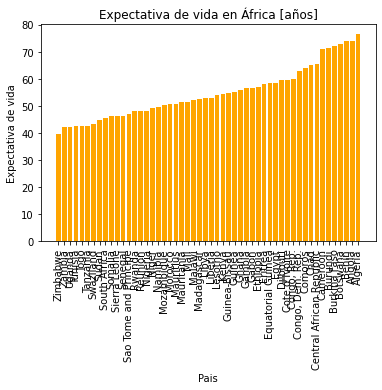

In [ ]:
# Aquí indicamos el orden en el que deben aparecer las barras
x_pos=[i for i,_ in enumerate(bars)]
# Ordenamos 
x_pos=np.sort(x_pos)
# Invertimos el orden para que sea ascendente
x_pos=x_pos[::-1]
# Creamos las barras
plt.bar(x_pos,height,color="orange")
# Creamos los nombres de los ejes
plt.xticks(x_pos,bars, rotation=90)
# Título
plt.title("Expectativa de vida en África [años]")
# Etiqueta del eje
plt.xlabel("Pais")
plt.ylabel("Expectativa de vida")


## Gráfica apilada de totales

Iniciemos con un ejemplo muy sencillo. En este caso, estamos generando un data frame desde cero.

Observa que el data frame tiene algunas características:
- El índice es una columna de categorías (se sitúan en el eje X)
- El restos de columnas son numéricas y cada una cuenta para un conjunto de barras
- Los valores de las columnas numéricas son las alturas de las barras

In [ ]:
esperanza_de_vida_mujeres = [85.10, 83.70	, 79.86	, 85.30	, 84.70, 79.65, 77.84]
esperanza_de_vida_hombres = [79.70, 79, 74.33, 79.2, 80.1, 74.06, 72.12]
index = ['España', 'Alemania', 'Colombia',
         'Francia', 'Italia', 'Ecuador', 'Mexico']



Para cambiar entre una gráfica de barras lado a lado a una de barras apiladas, cambia el valor del argumento **stacked** a True.

In [ ]:
df=pd.DataFrame({"Mujeres":esperanza_de_vida_mujeres,"Hombres":esperanza_de_vida_hombres}, index=index)
df

,Mujeres,Hombres
España,85.10,79.70
Alemania,83.70,79.00
Colombia,79.86,74.33
Francia,85.30,79.20
Italia,84.70,80.10
Ecuador,79.65,74.06
Mexico,77.84,72.12


<AxesSubplot:>

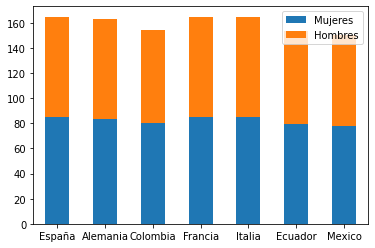

In [ ]:
df.plot.bar(rot=0,stacked=True)

### Ejemplo con dos columnas categóricas

Del total de vuelos en cada año, ¿qué parte corresponde a cade mes?

In [ ]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [ ]:
#Hacemos una copia del orignial para no editarlo directamente
flights_df=flights.copy()

Antes, debemos corroborar que la columna 'year' sea categórica

In [ ]:
flights_df.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [ ]:
#Convertimos el tipo de dato
flights_df["year"] = flights_df["year"].astype("category")
flights_df["month"] = flights_df["month"].astype("category")
flights_df.describe()


,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
flights_df.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
#cambiamos la estructura del dataframe tener la necesaria para la grafica
flights_df=flights_df.pivot_table(index=["year"],columns="month",values="passengers")
flights_df

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<AxesSubplot:xlabel='year'>

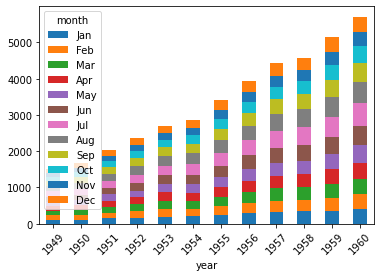

In [ ]:
flights_df.plot.bar(stacked=True,rot=45)

In [ ]:

#Rotamos a 45 grados los titulos de las barras del eje x

**Recuerda:** la cantidad de barras que verás en la gráfica corresponde con la cantidad de columnas numéricas en tu dataset

## 5. Gráfica de caja o bigotes (Box plot)

![image.png](https://storage.googleapis.com/campus-cvs/lectures/4.1%20Boxplot.png)

[mas info aqui](https://www.analisisdedatos.org/single-post/2019/04/05/c%C3%B3mo-se-interpreta-un-diagrama-de-cajas-y-bigotes)


#### Un boxplot solito para ver la distribución de una sola variable

<AxesSubplot:ylabel='sepal_length'>

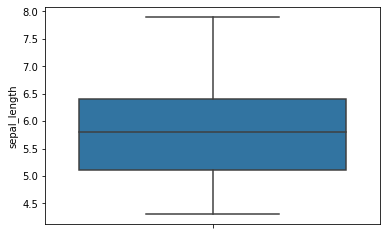

In [ ]:
sns.boxplot(y=iris["sepal_length"])                                                                                               #https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
#Podemos acompañar la grafica con esta sentencia para conocer los valores exactos de las estadisticas descriptivas.
iris["sepal_length"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

#### Múltiples boxplots para identificar distribuciones por categorías

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

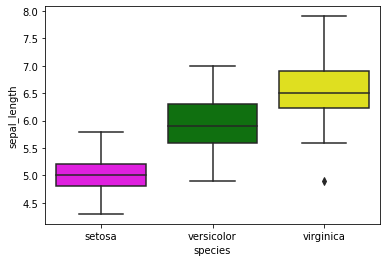

In [ ]:
my_var={"versicolor":"green","setosa":"magenta","virginica":"yellow"}
sns.boxplot(x=iris["species"], y=iris["sepal_length"],palette=my_var)

## 6. Mapa de calor (Heatmap)

In [ ]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [ ]:
flights_pivot=flights.pivot("month","year","passengers")
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

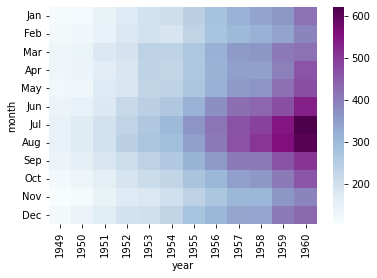

In [ ]:
# Graficamos utilizando distintas escalas de color
#sns.heatmap(flights_pivot, cmap="YlGnBu")
#sns.heatmap(flights_pivot, cmap="Blues")
sns.heatmap(flights_pivot, cmap="BuPu")
#sns.heatmap(flights_pivot, cmap="Greens")

## 7. Correlogram

#### Con subgrupos

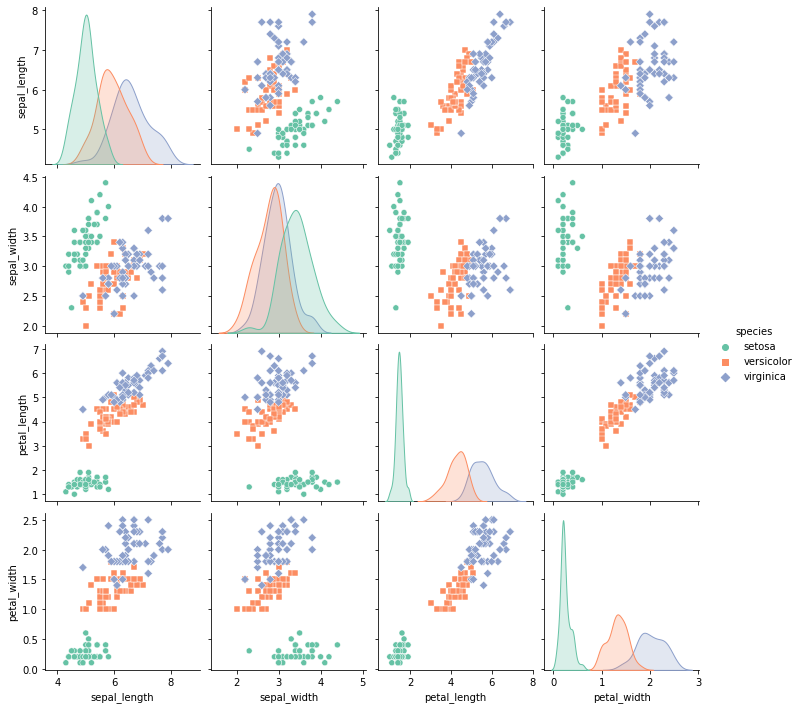

In [ ]:
#Trazar relaciones por pares en un conjunto de datos.
sns.pairplot(iris, kind="scatter", hue="species", markers=["o","s","D"],palette="Set2")
#plt.show()

## Material de referencia

- [From Data to Viz](https://www.data-to-viz.com/)
- [Python Graph Gallery](https://python-graph-gallery.com/)
- [Documentación de Seaborn](https://seaborn.pydata.org/examples/index.html)
- [Cómo la curva del elefante te ayudará a entender qué ha pasado con la desigualdad en el mundo](https://www.bbc.com/mundo/noticias-55699513)
- [Paletas de color de matplotlib (cmaps)](https://matplotlib.org/stable/tutorials/colors/colormaps.html)